In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
df_train = pd.read_csv(r'input/train.csv',header = 0)
df_test = pd.read_csv(r'input/test.csv',header = 0)

In [84]:
df_train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [85]:
df_test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [86]:
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [87]:
df_train.shape,df_test.shape

((10886, 12), (6493, 9))

In [88]:
# 检查数据完整性
df_train.count(),df_test.count()

(datetime      10886
 season        10886
 holiday       10886
 workingday    10886
 weather       10886
 temp          10886
 atemp         10886
 humidity      10886
 windspeed     10886
 casual        10886
 registered    10886
 count         10886
 dtype: int64, datetime      6493
 season        6493
 holiday       6493
 workingday    6493
 weather       6493
 temp          6493
 atemp         6493
 humidity      6493
 windspeed     6493
 dtype: int64)

In [89]:
df_train.info(),df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     64

(None, None)

In [90]:
# 准备处理时间
type(df_train.datetime)

pandas.core.series.Series

In [91]:
# 把月、日、和 小时单独拎出来，放到3列中
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour

df_test['month'] = pd.DatetimeIndex(df_test.datetime).month
df_test['day'] = pd.DatetimeIndex(df_test.datetime).dayofweek
df_test['hour'] = pd.DatetimeIndex(df_test.datetime).hour


In [92]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4


In [93]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,3,4


In [94]:
# 备份数据
df_train_origin = df_train
df_test_origin = df_test
# 抛掉不要的字段
df_train = df_train.drop(['datetime','casual','registered'], axis = 1)
df_test = df_test.drop(['datetime'],axis=1)

In [95]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,5,4


In [96]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,1,3,4


In [97]:
df_train.shape,df_test.shape

((10886, 12), (6493, 11))

In [98]:
# 把target从数据中分开
df_train_target = df_train['count'].values
df_train_data = df_train.drop(['count'],axis = 1).values
print('df_train_data shape is ', df_train_data.shape)
print('df_train_target shape is ', df_train_target.shape)

df_train_data shape is  (10886, 11)
df_train_target shape is  (10886,)


In [99]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

In [100]:
# 切分一下数据（训练集和测试集）
cv = model_selection.ShuffleSplit(n_splits=3, test_size=0.5, random_state=0)

# 各种模型来一圈

print("岭回归")    
for train, test in cv.split(df_train_data):    
    svc = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print("支持向量回归/SVR(kernel='rbf',C=10,gamma=.001)")
for train, test in cv.split(df_train_data):
    
    svc = svm.SVR(kernel ='rbf', C = 10, gamma = .001).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print("随机森林回归/Random Forest(n_estimators = 100)")    
for train, test in cv.split(df_train_data):    
    svc = RandomForestRegressor(n_estimators = 100).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

岭回归
train score: 0.328, test score: 0.346

train score: 0.324, test score: 0.350

train score: 0.344, test score: 0.329

支持向量回归/SVR(kernel='rbf',C=10,gamma=.001)
train score: 0.391, test score: 0.402

train score: 0.385, test score: 0.419

train score: 0.401, test score: 0.387

随机森林回归/Random Forest(n_estimators = 100)
train score: 0.980, test score: 0.856

train score: 0.980, test score: 0.861

train score: 0.979, test score: 0.853



In [106]:
# 看起来随机森林效果最佳
# 网格搜索，交叉验证，查找最佳参数
X = df_train_data
y = df_train_target

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=0)

tuned_parameters = [{'n_estimators':[10,100,500]}]   
    
scores = ['r2']

for i,score in enumerate(scores):
    
    print(score)
    
    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("最佳参数找到了！")
    print("")
    #best_estimator_ returns the best estimator chosen by the search
    print(clf.best_estimator_)
    print("")
    print("得分分别是:")
    print("")
    #grid_scores_的返回值:
    #    * a dict of parameter settings
    #    * the mean score over the cross-validation folds 
    #    * the list of scores for each fold
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print("")
    print("预测测试集。。。")
    predictions = clf.best_estimator_.predict(df_test)
    print("预测结束，输出预测结果")
    result = pd.DataFrame({'datetime':df_test_origin['datetime'].as_matrix(), 'count':predictions.astype(np.int32)})
    result.to_csv(r"input/Random_Forest_predictions" + str(i) + ".csv", index=False)
    print("预测结果输出完毕")



r2
最佳参数找到了！

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

得分分别是:

0.848 (+/-0.006) for {'n_estimators': 10}
0.862 (+/-0.005) for {'n_estimators': 100}
0.863 (+/-0.006) for {'n_estimators': 500}

预测测试集。。。
预测结束，输出预测结果
预测结果输出完毕


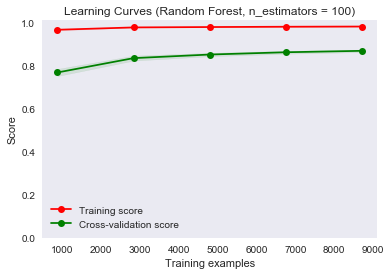

In [107]:
# 画出学期曲线，查看是否过拟合/欠拟合
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv.split(X), n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid()

    return plt


title = "Learning Curves (Random Forest, n_estimators = 100)"
cv = model_selection.ShuffleSplit(n_splits=10,test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators = 100)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

In [108]:
# 训练集和测试集直接间隔那么大，一定是过拟合了,随机森林这种算法学习能力非常强
# 尝试一下缓解过拟合，未必成功
print("随机森林回归/Random Forest(n_estimators=200, max_features=0.6, max_depth=15)")
for train, test in cv.split(X): 
    svc = RandomForestRegressor(n_estimators = 200, max_features=0.6, max_depth=15).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

随机森林回归/Random Forest(n_estimators=200, max_features=0.6, max_depth=15)
train score: 0.966, test score: 0.869

train score: 0.966, test score: 0.885

train score: 0.965, test score: 0.872

train score: 0.965, test score: 0.877

train score: 0.967, test score: 0.870

train score: 0.966, test score: 0.872

train score: 0.966, test score: 0.863

train score: 0.966, test score: 0.874

train score: 0.965, test score: 0.872

train score: 0.966, test score: 0.868



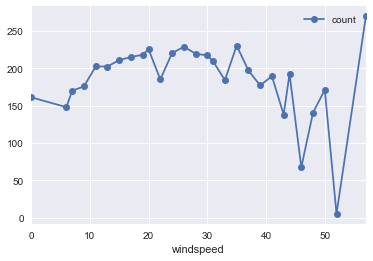

In [109]:
##############################################
##                数据分析                  ##
##############################################

# 风速
df_train_origin.groupby('windspeed').mean().plot(y='count', marker='o')
plt.show()

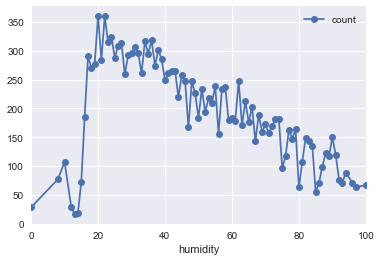

In [110]:
# 湿度
df_train_origin.groupby('humidity').mean().plot(y='count', marker='o')
plt.show()

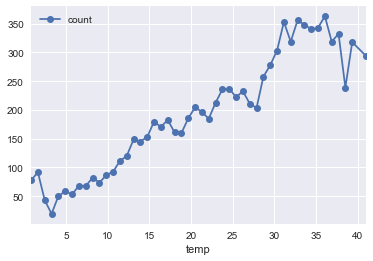

In [111]:
# 温度
df_train_origin.groupby('temp').mean().plot(y='count', marker='o')
plt.show()

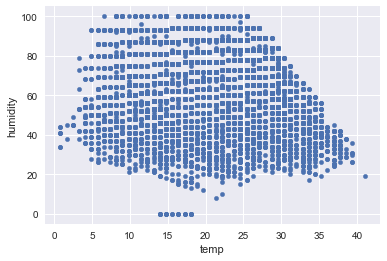

In [112]:
#温度湿度变化
df_train_origin.plot(x='temp', y='humidity', kind='scatter')
plt.show()

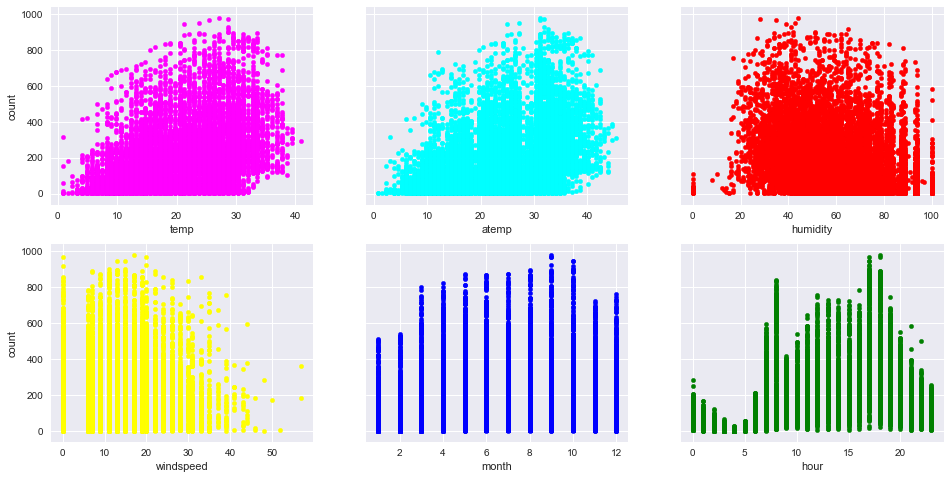

In [113]:
# scatter一下各个维度
fig, axs = plt.subplots(2, 3, sharey=True)
df_train_origin.plot(kind='scatter', x='temp', y='count', ax=axs[0, 0], figsize=(16, 8), color='magenta')
df_train_origin.plot(kind='scatter', x='atemp', y='count', ax=axs[0, 1], color='cyan')
df_train_origin.plot(kind='scatter', x='humidity', y='count', ax=axs[0, 2], color='red')
df_train_origin.plot(kind='scatter', x='windspeed', y='count', ax=axs[1, 0], color='yellow')
df_train_origin.plot(kind='scatter', x='month', y='count', ax=axs[1, 1], color='blue')
df_train_origin.plot(kind='scatter', x='hour', y='count', ax=axs[1, 2], color='green')

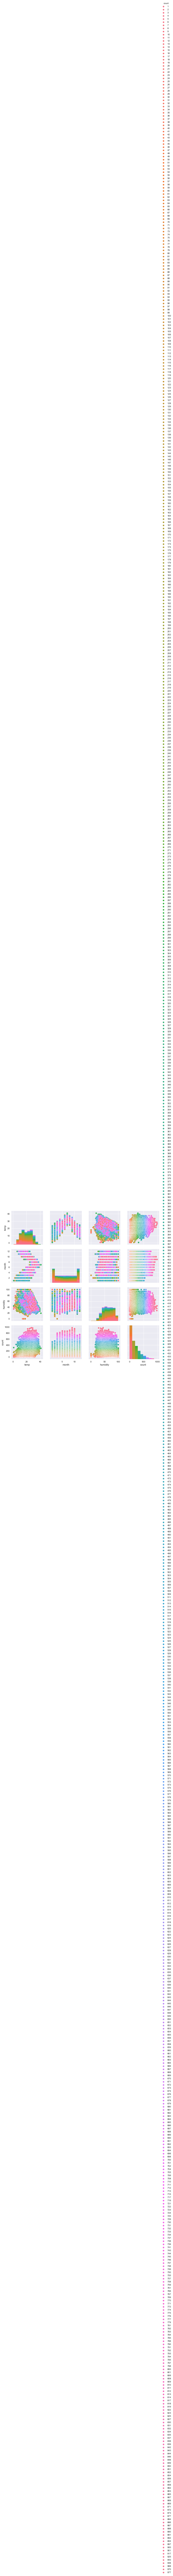

In [114]:
sns.pairplot(df_train_origin[["temp", "month", "humidity", "count"]], hue="count")

In [115]:
# 来看看相关度咯
corr = df_train_origin[['temp','weather','windspeed','day', 'month', 'hour','count']].corr()
corr

,temp,weather,windspeed,day,month,hour,count
temp,1.000000,-0.055035,-0.017852,-0.038466,0.257589,0.145430,0.394454
weather,-0.055035,1.000000,0.007261,-0.047692,0.012144,-0.022740,-0.128655
windspeed,-0.017852,0.007261,1.000000,-0.024804,-0.150192,0.146631,0.101369
day,-0.038466,-0.047692,-0.024804,1.000000,-0.002266,-0.002925,-0.002283
month,0.257589,0.012144,-0.150192,-0.002266,1.000000,-0.006818,0.166862
hour,0.145430,-0.022740,0.146631,-0.002925,-0.006818,1.000000,0.400601
count,0.394454,-0.128655,0.101369,-0.002283,0.166862,0.400601,1.000000


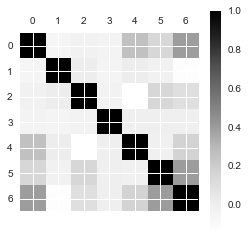

In [116]:
# 用颜色深浅来表示相关度
plt.figure()
plt.matshow(corr)
plt.colorbar()
plt.show()